In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# output directory
OUTPUT_DIR = "./output"
os.makedirs(OUTPUT_DIR, exist_ok=True)

RAW_PATH = "global_air_quality_data_10000.csv"

pd.set_option('display.max_columns', 50)


In [30]:
df = pd.read_csv(RAW_PATH)

print("Shape:", df.shape)
display(df.head())


Shape: (10000, 12)


,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


In [31]:
df.columns = df.columns.str.strip()

# Convert Date to datetime
df['timestamp'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where timestamp failed
df = df.dropna(subset=['timestamp']).reset_index(drop=True)

df = df.drop(columns=['Date'])

print("After timestamp conversion:", df.shape)
display(df.head())


After timestamp conversion: (10000, 12)


,City,Country,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,timestamp
0,Bangkok,Thailand,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76,2023-03-19
1,Istanbul,Turkey,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36,2023-02-16
2,Rio de Janeiro,Brazil,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87,2023-11-13
3,Mumbai,India,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71,2023-03-16
4,Paris,France,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16,2023-04-04


In [32]:
pollutant_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
weather_cols = ['Temperature', 'Humidity', 'Wind Speed']
meta_cols = ['City', 'Country']

print("Pollutant columns:", pollutant_cols)
print("Weather columns:", weather_cols)


Pollutant columns: ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
Weather columns: ['Temperature', 'Humidity', 'Wind Speed']


In [33]:
df = df.set_index('timestamp').sort_index()

print("Date range:", df.index.min(), "→", df.index.max())
df.head()


Date range: 2023-01-01 00:00:00 → 2023-12-28 00:00:00


,City,Country,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
timestamp,,,,,,,,,,,
2023-01-01,Bangkok,Thailand,146.15,17.85,8.16,26.30,6.47,32.08,-2.45,40.91,18.89
2023-01-01,Rio de Janeiro,Brazil,52.43,76.80,46.99,13.02,8.41,184.43,20.31,63.21,0.71
2023-01-01,Cairo,Egypt,115.16,73.60,53.68,23.44,6.33,156.81,4.12,37.98,11.75
2023-01-01,Istanbul,Turkey,86.32,177.30,80.24,30.32,8.76,86.34,23.66,96.27,0.87
2023-01-01,Rio de Janeiro,Brazil,10.24,118.73,51.87,39.72,4.61,136.18,9.69,27.61,3.52


In [34]:
df[pollutant_cols] = df[pollutant_cols].interpolate(method='time').ffill().bfill()

df[weather_cols] = df[weather_cols].interpolate().ffill().bfill()

df.head()


,City,Country,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
timestamp,,,,,,,,,,,
2023-01-01,Bangkok,Thailand,146.15,17.85,8.16,26.30,6.47,32.08,-2.45,40.91,18.89
2023-01-01,Rio de Janeiro,Brazil,52.43,76.80,46.99,13.02,8.41,184.43,20.31,63.21,0.71
2023-01-01,Cairo,Egypt,115.16,73.60,53.68,23.44,6.33,156.81,4.12,37.98,11.75
2023-01-01,Istanbul,Turkey,86.32,177.30,80.24,30.32,8.76,86.34,23.66,96.27,0.87
2023-01-01,Rio de Janeiro,Brazil,10.24,118.73,51.87,39.72,4.61,136.18,9.69,27.61,3.52


In [35]:
# Rolling windows (3-day and 7-day)
df['roll_mean_3d']  = df['PM2.5'].rolling(window=3, min_periods=1).mean()
df['roll_mean_7d']  = df['PM2.5'].rolling(window=7, min_periods=1).mean()
df['roll_std_7d']   = df['PM2.5'].rolling(window=7, min_periods=1).std()

# Lag features
for lag in [1, 2, 3, 7]:
    df[f'lag_{lag}'] = df['PM2.5'].shift(lag)

df = df.fillna(method='bfill').fillna(method='ffill')

display(df.head())


C:\Users\Uttam\AppData\Local\Temp\ipykernel_18680\2141978795.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill').fillna(method='ffill')


,City,Country,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,roll_mean_3d,roll_mean_7d,roll_std_7d,lag_1,lag_2,lag_3,lag_7
timestamp,,,,,,,,,,,,,,,,,,
2023-01-01,Bangkok,Thailand,146.15,17.85,8.16,26.30,6.47,32.08,-2.45,40.91,18.89,146.150000,146.150,66.270048,146.15,146.15,146.15,146.15
2023-01-01,Rio de Janeiro,Brazil,52.43,76.80,46.99,13.02,8.41,184.43,20.31,63.21,0.71,99.290000,99.290,66.270048,146.15,146.15,146.15,146.15
2023-01-01,Cairo,Egypt,115.16,73.60,53.68,23.44,6.33,156.81,4.12,37.98,11.75,104.580000,104.580,47.747376,52.43,146.15,146.15,146.15
2023-01-01,Istanbul,Turkey,86.32,177.30,80.24,30.32,8.76,86.34,23.66,96.27,0.87,84.636667,100.015,40.040373,115.16,52.43,146.15,146.15
2023-01-01,Rio de Janeiro,Brazil,10.24,118.73,51.87,39.72,4.61,136.18,9.69,27.61,3.52,70.573333,82.060,53.050295,86.32,115.16,52.43,146.15


In [36]:
df['day']       = df.index.day
df['month']     = df.index.month
df['dayofweek'] = df.index.dayofweek
df['year']      = df.index.year

df.head()


,City,Country,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,roll_mean_3d,roll_mean_7d,roll_std_7d,lag_1,lag_2,lag_3,lag_7,day,month,dayofweek,year
timestamp,,,,,,,,,,,,,,,,,,,,,,
2023-01-01,Bangkok,Thailand,146.15,17.85,8.16,26.30,6.47,32.08,-2.45,40.91,18.89,146.150000,146.150,66.270048,146.15,146.15,146.15,146.15,1,1,6,2023
2023-01-01,Rio de Janeiro,Brazil,52.43,76.80,46.99,13.02,8.41,184.43,20.31,63.21,0.71,99.290000,99.290,66.270048,146.15,146.15,146.15,146.15,1,1,6,2023
2023-01-01,Cairo,Egypt,115.16,73.60,53.68,23.44,6.33,156.81,4.12,37.98,11.75,104.580000,104.580,47.747376,52.43,146.15,146.15,146.15,1,1,6,2023
2023-01-01,Istanbul,Turkey,86.32,177.30,80.24,30.32,8.76,86.34,23.66,96.27,0.87,84.636667,100.015,40.040373,115.16,52.43,146.15,146.15,1,1,6,2023
2023-01-01,Rio de Janeiro,Brazil,10.24,118.73,51.87,39.72,4.61,136.18,9.69,27.61,3.52,70.573333,82.060,53.050295,86.32,115.16,52.43,146.15,1,1,6,2023


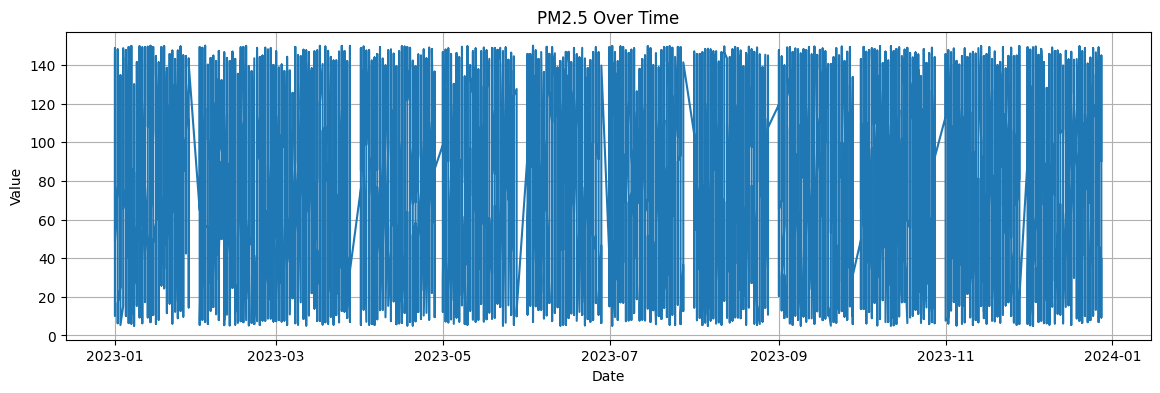

In [37]:
plt.figure(figsize=(14,4))
plt.plot(df.index, df['PM2.5'], label='PM2.5')
plt.title("PM2.5 Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()


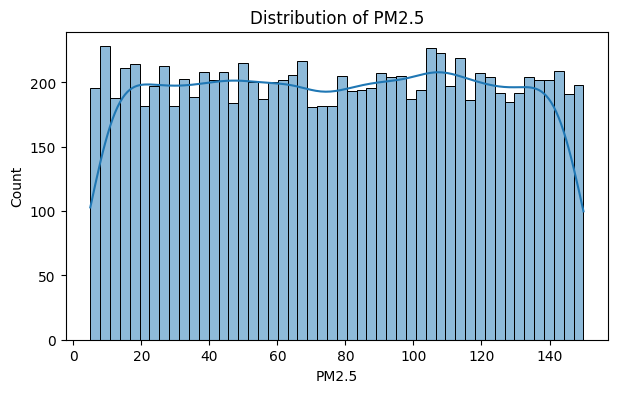

In [38]:
plt.figure(figsize=(7,4))
sns.histplot(df['PM2.5'], bins=50, kde=True)
plt.title("Distribution of PM2.5")
plt.show()


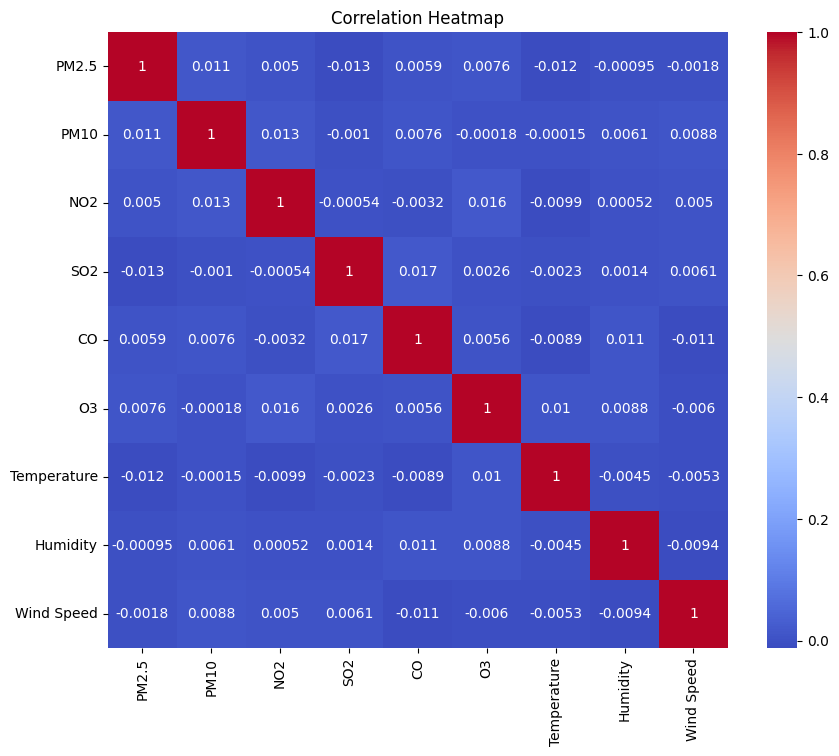

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(df[pollutant_cols + weather_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [41]:
out_path = os.path.join(OUTPUT_DIR, "processed_features.csv")
df.to_csv(out_path)

print("Processed dataset saved to:", out_path)
df.shape


Processed dataset saved to: ./output\processed_features.csv


(10000, 22)